In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


In [3]:
file_path = "Data/AP001.csv"

# Baca ulang data untuk memastikan format tanggal benar
df = pd.read_csv(file_path)
df.head()

,From Date,To Date,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),...,Temp (degree C),RH (%),WS (m/s),WD (deg),SR (W/mt2),BP (mmHg),VWS (m/s),Xylene (ug/m3),RF (mm),AT (degree C)
0,2016-07-01 10:00:00,2016-07-01 11:00:00,10.67,39.0,17.67,39.2,32.33,7.07,6.60,0.48,...,33.43,71.67,2.30,226.33,123.67,NaN,-0.1,0.1,0.0,23.05
1,2016-07-01 11:00:00,2016-07-01 12:00:00,2.00,39.0,20.50,41.9,35.80,7.40,NaN,0.49,...,33.70,70.00,2.50,223.00,186.00,NaN,-0.1,0.1,0.0,NaN
2,2016-07-01 12:00:00,2016-07-01 13:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-07-01 13:00:00,2016-07-01 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-07-01 14:00:00,2016-07-01 15:00:00,20.50,50.0,15.40,43.6,32.78,6.35,6.38,0.47,...,33.57,63.50,1.88,223.00,240.50,NaN,-0.1,0.1,0.0,NaN


In [4]:
df_PM10 = df[["From Date", "PM10 (ug/m3)"]]
df_PM10.head(10)

,From Date,PM10 (ug/m3)
0,2016-07-01 10:00:00,39.00
1,2016-07-01 11:00:00,39.00
2,2016-07-01 12:00:00,NaN
3,2016-07-01 13:00:00,NaN
4,2016-07-01 14:00:00,50.00
5,2016-07-01 15:00:00,59.50
6,2016-07-01 16:00:00,60.00
7,2016-07-01 17:00:00,57.50
8,2016-07-01 18:00:00,57.75
9,2016-07-01 19:00:00,63.00


/home/bdsrc/miniconda3/envs/pollution/lib/python3.12/site-packages/pandas/core/groupby/grouper.py:381: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  ax = Index(obj[key], name=key)


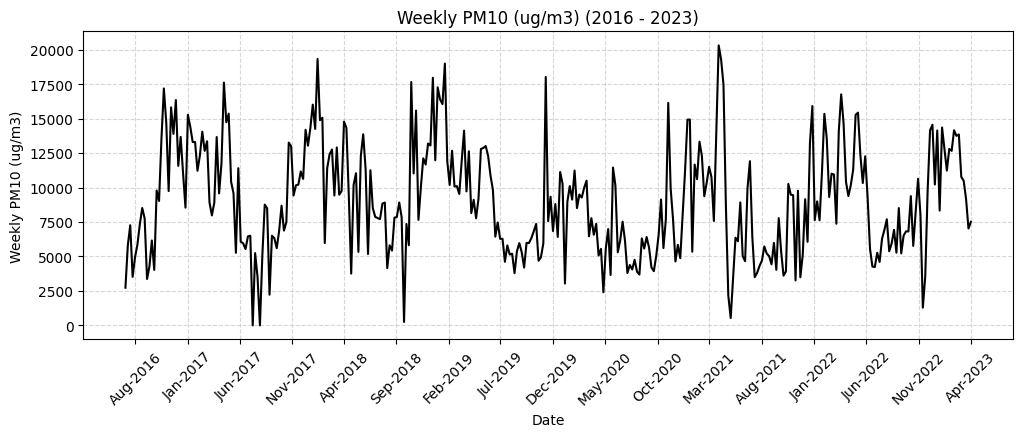

In [5]:
# Pastikan kolom tanggal dikonversi dengan benar
df_PM10.loc[:, "From Date"] = pd.to_datetime(df_PM10["From Date"])

# Hapus baris dengan tanggal yang tidak terbaca (NaT)
df_PM10 = df_PM10.dropna(subset=["From Date"])

# Agregasi data per minggu
df_weekly_fixed = df_PM10.resample('W', on="From Date").sum()

# Plot ulang dengan format tanggal yang benar
plt.figure(figsize=(12, 4))
plt.plot(df_weekly_fixed.index, df_weekly_fixed["PM10 (ug/m3)"], color="black")

# Format sumbu X agar menampilkan bulan dan tahun dengan benar
plt.xlabel("Date")
plt.ylabel("Weekly PM10 (ug/m3)")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.5)
plt.title("Weekly PM10 (ug/m3) (2016 - 2023)")

# Atur format sumbu X agar menampilkan bulan dan tahun
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=5))  # Setiap 5 bulan

# simpan ke JPG
plt.savefig('Img/weekly PM10.png', bbox_inches='tight')

# Tampilkan grafik
plt.show()


In [16]:
df_weekly_fixed.describe()

,PM10 (ug/m3)
count,353.000000
mean,9028.404108
std,3948.942421
min,0.000000
25%,5868.100000
50%,8901.330000
75%,11774.580000
max,20309.250000


In [17]:
df_weekly_fixed.shape

(353, 1)

In [31]:
df_weekly_fixed = df_weekly_fixed[df_weekly_fixed['PM10 (ug/m3)'] != 0]


In [34]:
df_weekly_fixed.to_csv("Weekly PM10 in Andhra Pradesh.csv")

In [7]:
df_weekly_fixed.head()

,PM10 (ug/m3)
From Date,
2016-07-03,2733.09
2016-07-10,5810.84
2016-07-17,7263.76
2016-07-24,3518.90
2016-07-31,4941.77


In [32]:
print((df_weekly_fixed['PM10 (ug/m3)'] == 0).sum())  # Berapa banyak nilai nol?


0


In [25]:
print(df_weekly_fixed[df_weekly_fixed['PM10 (ug/m3)'].isnull()])


Empty DataFrame
Columns: [PM10 (ug/m3)]
Index: []


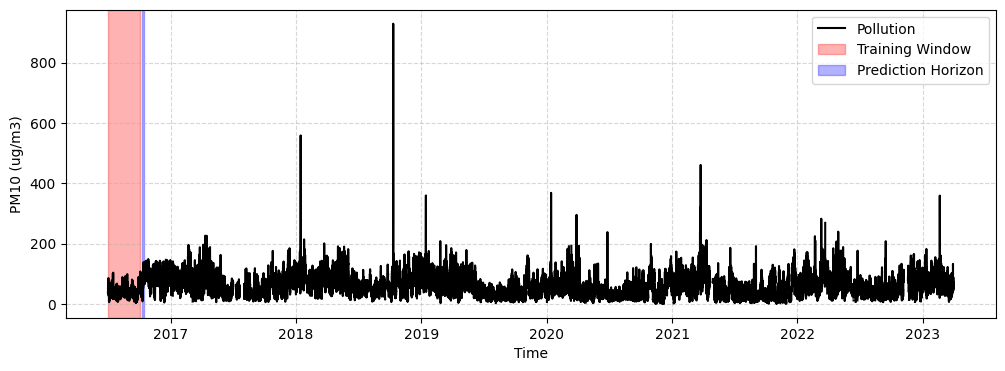

In [6]:
# Plot data kasus dengue dengan area Training Window dan Prediction Horizon
fig, ax = plt.subplots(figsize=(12, 4))

# Plot garis kasus dengue
ax.plot(df_PM10["From Date"], df_PM10["PM10 (ug/m3)"], color="black", label="Pollution")

# Tentukan rentang waktu untuk Training Window dan Prediction Horizon
training_start = "2016-07-03"
training_end = "2016-10-02"
prediction_start = "2016-10-09"
prediction_end = "2016-10-16"

# Tambahkan area berwarna untuk Training Window
ax.axvspan(pd.to_datetime(training_start), pd.to_datetime(training_end), 
           color='red', alpha=0.3, label="Training Window")

# Tambahkan area berwarna untuk Prediction Horizon
ax.axvspan(pd.to_datetime(prediction_start), pd.to_datetime(prediction_end), 
           color='blue', alpha=0.3, label="Prediction Horizon")

# Format sumbu X agar menampilkan tahun dan bulan
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_major_locator(mdates.YearLocator(1))

# Tambahkan label dan grid
ax.set_xlabel("Time")
ax.set_ylabel("PM10 (ug/m3)")
ax.legend(loc="upper right")
ax.grid(True, linestyle="--", alpha=0.5)

# simpan ke PNG
plt.savefig('Img/Illustration of moving window.png', bbox_inches='tight')

# Tampilkan grafik
plt.show()


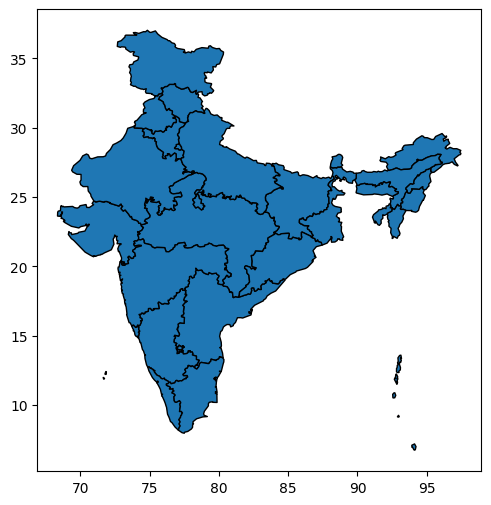

In [7]:
import geopandas as gpd
shp_path = "India Shape/india_st.shp"  # Replace with your actual file path
gdf = gpd.read_file(shp_path)


# Plot the shapefile
gdf.plot(figsize=(10, 6), edgecolor="black")
plt.show()

In [58]:
gdf

,STATE,geometry
0,ANDAMAN AND NICOBAR ISLANDS,"MULTIPOLYGON (((94.08923 6.73365, 93.97717 6.9..."
1,ANDHRA PRADESH,"POLYGON ((82.00063 17.95354, 82.11718 18.02457..."
2,ARUNACHAL PRADESH,"POLYGON ((95.61476 27.34745, 95.69234 27.33888..."
3,ASSAM,"POLYGON ((92.82207 25.57781, 92.69672 25.61368..."
4,BIHAR,"POLYGON ((84.16946 26.28322, 83.91399 26.38523..."
5,CHANDIGARH,"POLYGON ((76.85168 30.75696, 76.85275 30.70596..."
6,DADRA AND NAGAR HAVELI,"POLYGON ((72.99248 20.22041, 72.96240 20.28906..."
7,DAMAN AND DIU,"MULTIPOLYGON (((72.86860 20.32225, 72.92085 20..."
8,DELHI,"POLYGON ((76.92160 28.78554, 77.11057 28.83400..."
9,GOA,"POLYGON ((73.70534 15.71924, 73.83531 15.77222..."


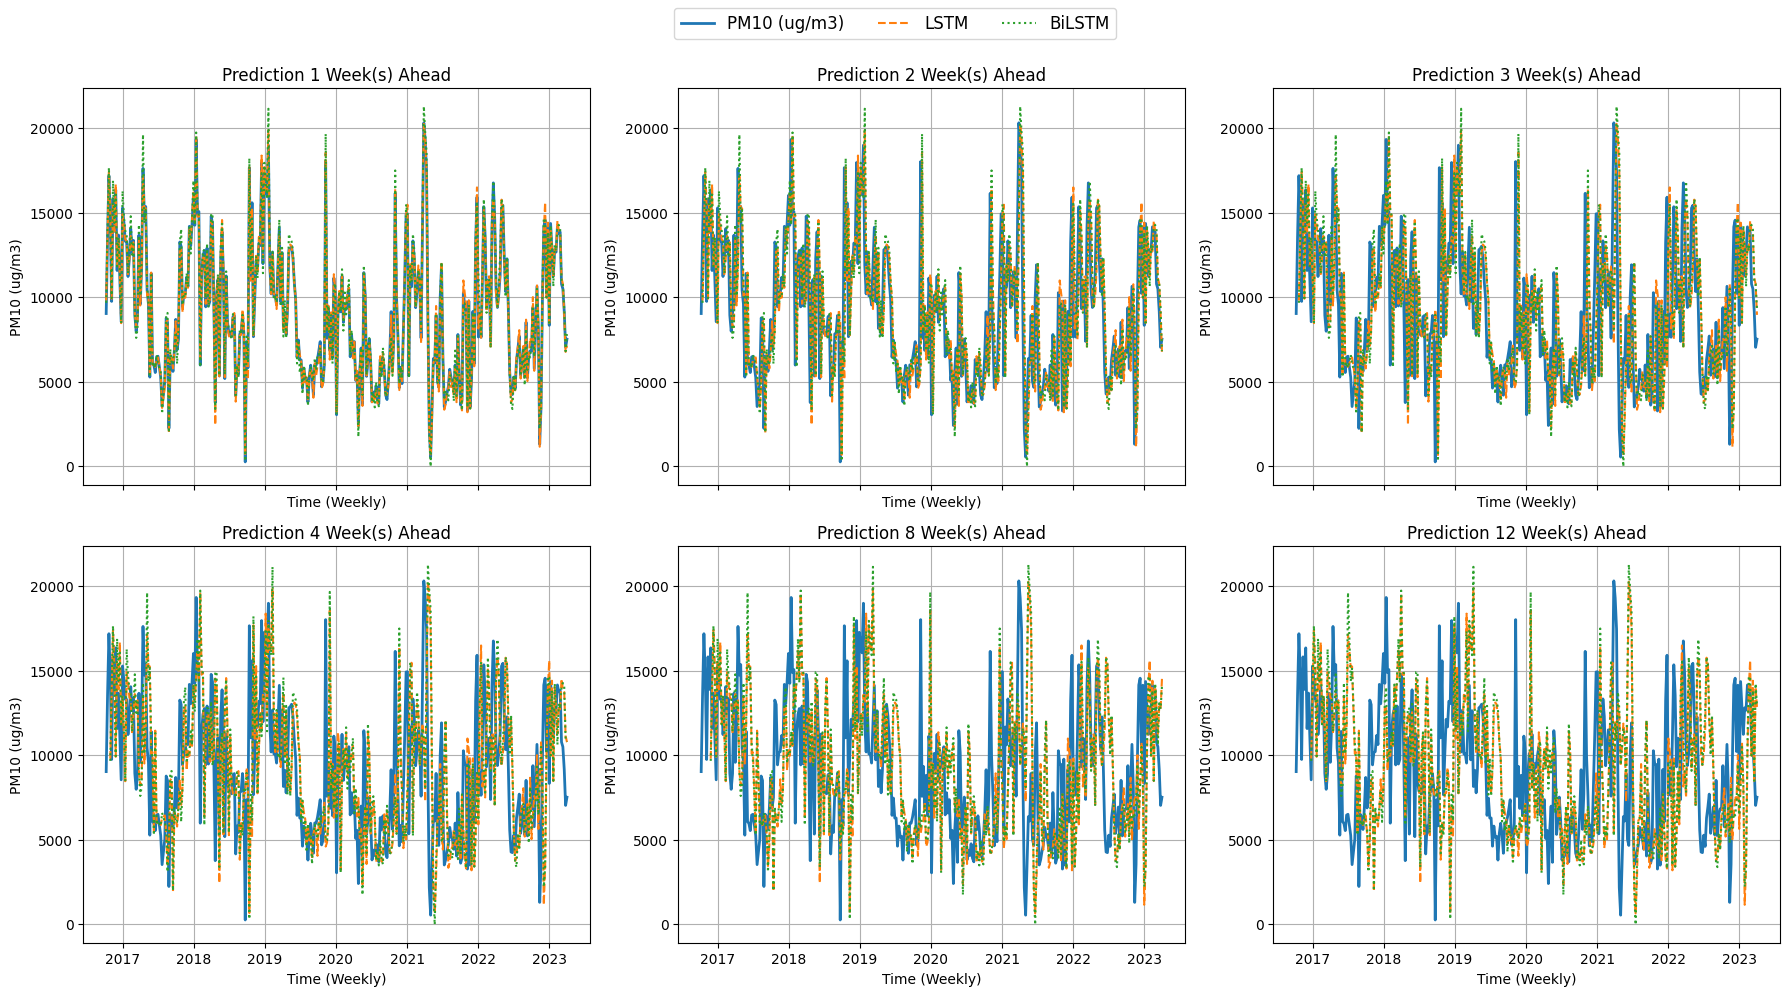

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
bilstm_df = pd.read_csv('Output/BiLSTM_1000.csv')
lstm_df = pd.read_csv('Output/LSTM_1000.csv')

# Convert 'Datetime' to datetime format
bilstm_df['Datetime'] = pd.to_datetime(bilstm_df['Datetime'])
lstm_df['Datetime'] = pd.to_datetime(lstm_df['Datetime'])

# List of prediction weeks
weeks = [1, 2, 3, 4, 8, 12]

# Buat figure dan axes 2 baris x 3 kolom
fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharex=True)

# Flatten axes array untuk memudahkan iterasi
axes = axes.flatten()

# Plot untuk masing-masing minggu
for i, week in enumerate(weeks):
    ax = axes[i]
    ax.plot(bilstm_df['Datetime'], bilstm_df['PM10 (ug/m3)'], label='PM10 (ug/m3)', linewidth=2)
    ax.plot(lstm_df['Datetime'], lstm_df[f'Predicted_Cases_Week{week}'], label='LSTM', linestyle='--')
    ax.plot(bilstm_df['Datetime'], bilstm_df[f'Predicted_Cases_Week{week}'], label='BiLSTM', linestyle=':')
    
    ax.set_title(f'Prediction {week} Week(s) Ahead')
    ax.set_xlabel('Time (Weekly)')
    ax.set_ylabel('PM10 (ug/m3)')
    ax.grid(True)

# Tambahkan legenda hanya sekali di luar plot
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3, fontsize='large')

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Sisakan ruang untuk judul global

plt.savefig('Img/Comparison of Prediction by LSTM and BiLSTM.png', bbox_inches='tight')

plt.show()
